# Run Gaussian smoothing kernel over spectrum image
Cropped STEM-EDS dataset is used for testing (data.hspy).  
The temDM MSA filtered datasets were saved as dm3 and used for reference, but not uploaded due to their size.

In [1]:
%matplotlib nbagg
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = hs.load('data.hspy')

In [3]:
s

<EDSTEMSpectrum, title: EDX, dimensions: (100, 70|4096)>

Change data to float, else scipy.ndimage.gaussian_filter keeps integer values, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html.

In [4]:
s.change_dtype('float')

Generate and visualize a Gaussian smoothing kernel

In [5]:
from scipy.ndimage import gaussian_filter

In [6]:
adim = 11 #adim x adim pixel window

np.floor(adim/2)
a = np.zeros((adim, adim))
a[int(np.floor(adim/2)), int(np.floor(adim/2))] = 1

<IPython.core.display.Javascript object>


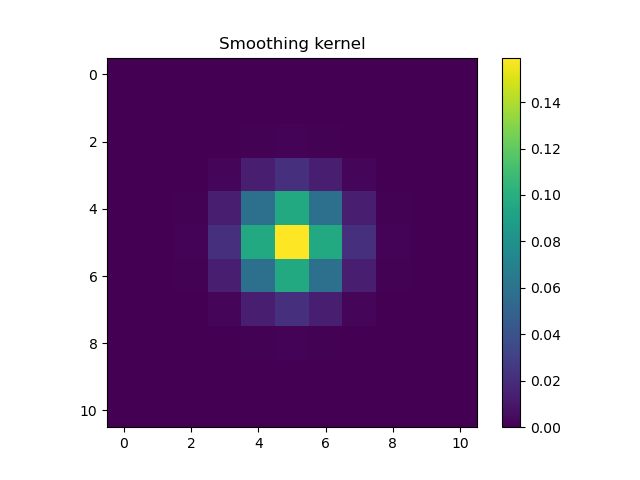

In [7]:
sigma = 1
trunc = 4

kernel = gaussian_filter(a, sigma=sigma, truncate=trunc)

plt.imshow(kernel)
plt.title('Smoothing kernel')
plt.colorbar()

# Filtering in spatial/navigation dimension

### temDM MSA plugin reference
Data was smoothed by Gaussian filter kernel in temDM MSA plugin (basic version) by Pavel Potapov. Gaussian filter in spatial dimension with sigma=1.

In [8]:
sg1 = hs.load('data_spatial.dm3') #not uploaded to repository

### map() version (spatial dimension)

In [9]:
sg2 = s.T.map(gaussian_filter, sigma=sigma, truncate=trunc, inplace=False, parallel=True).T

Compare both spectrum images at some position/pixel --> Good agreement

In [10]:
x, y = 5, 5
emin, emax = 1.0, 2.0

<IPython.core.display.Javascript object>


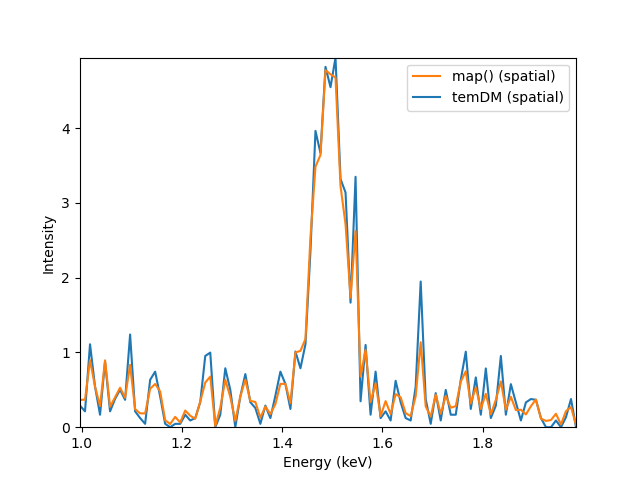

<AxesSubplot:xlabel='Energy (keV)', ylabel='Intensity'>

In [11]:
hs.plot.plot_spectra([sg1.inav[x,y].isig[emin:emax], sg2.inav[x,y].isig[emin:emax]], 
                     legend=['temDM (spatial)', 'map() (spatial)'])

# Filtering in energy/signal dimension

### temDM MSA plugin reference
Data was smoothed by Gaussian filter kernel in temDM MSA plugin (basic version) by Pavel Potapov. Gaussian filter in energy dimension with sigma=1.

In [12]:
sg3 = hs.load('data_energy.dm3') #not uploaded to repository

### map() version (energy dimension)

In [13]:
sg4 = s.map(gaussian_filter, sigma=sigma, truncate=trunc, inplace=False)

Compare both spectrum images at some pixel --> Good agreement, albeit some slight energy offset?

<IPython.core.display.Javascript object>


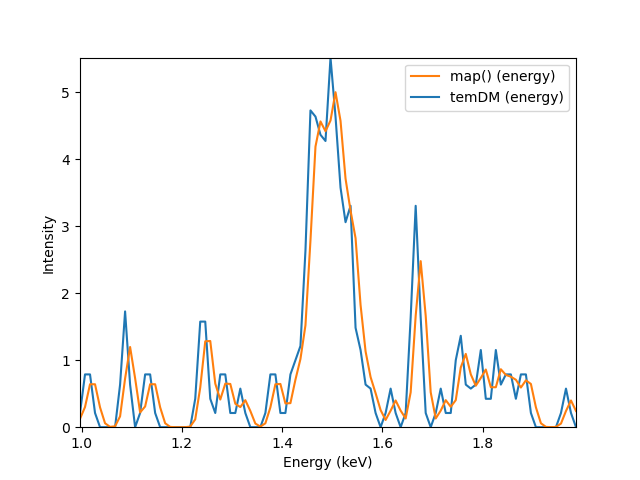

<AxesSubplot:xlabel='Energy (keV)', ylabel='Intensity'>

In [14]:
hs.plot.plot_spectra([sg3.inav[x,y].isig[emin:emax], sg4.inav[x,y].isig[emin:emax]], 
                     legend=['temDM (energy)', 'map() (energy)'])

# Apply gaussian_filter directly on s

In [15]:
sg5 = gaussian_filter(s, sigma=sigma, truncate=trunc)

sg5 is a numpy array, transform back to HyperSpy signal:

In [16]:
sg5 = hs.signals.Signal1D(sg5)
sg5.axes_manager = s.axes_manager 

Compare with temDM reference and map() method:

<IPython.core.display.Javascript object>


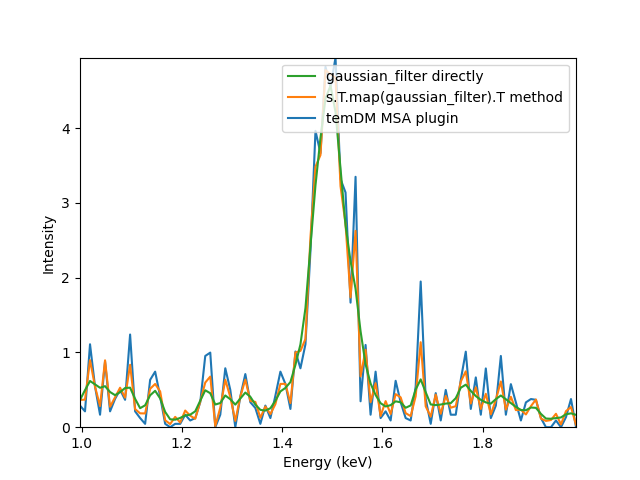

<AxesSubplot:xlabel='Energy (keV)', ylabel='Intensity'>

In [17]:
hs.plot.plot_spectra([sg1.inav[x,y].isig[emin:emax], sg2.inav[x,y].isig[emin:emax], sg5.inav[x,y].isig[emin:emax]], 
                     legend=['temDM MSA plugin', 's.T.map(gaussian_filter).T method', 'gaussian_filter directly'])

More smoothing is visible for direct `gaussian_filter(s)`. Test, if it also smooths over energy axis.

### map() over both dimensions

sg2 is Gaussian filtered over spatial dimension, so we additionally filter over energy dimension:

In [18]:
sg6 = sg2.map(gaussian_filter, sigma=sigma, truncate=trunc, inplace=False)

<IPython.core.display.Javascript object>


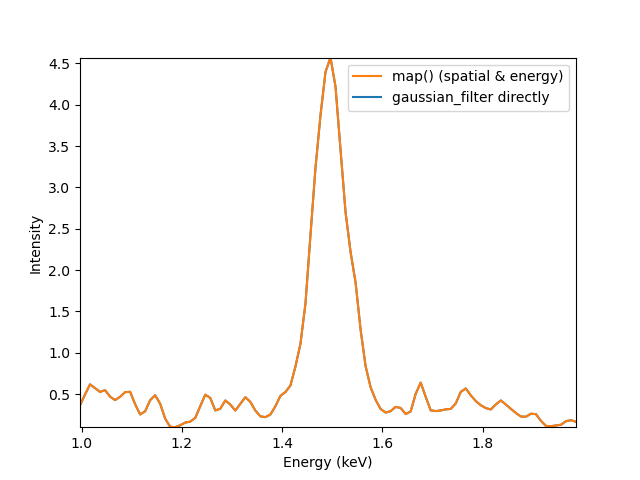

<AxesSubplot:xlabel='Energy (keV)', ylabel='Intensity'>

In [19]:
hs.plot.plot_spectra([sg5.inav[x,y].isig[emin:emax], sg6.inav[x,y].isig[emin:emax]], 
                     legend=['gaussian_filter directly', 'map() (spatial & energy)'])

The `map()` method over spatial and signal dimension gives same result as `gaussian_filter(s)`.Therefore, `gaussian_filter(s)` seems to run over both spatial and signal dimension.